<a href="https://colab.research.google.com/github/PadalaPrudhvi/FMML_PROJECTS-_AND_ASSIGNMENTS/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [10]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

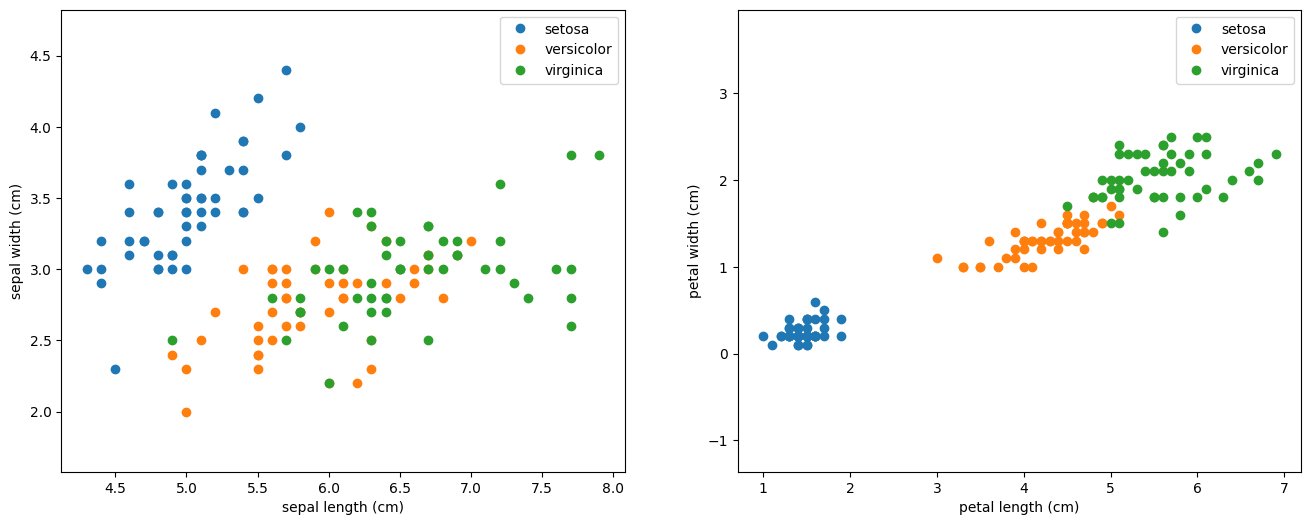

In [11]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [12]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [13]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [14]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [15]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 314.05it/s]


# Plot training progress

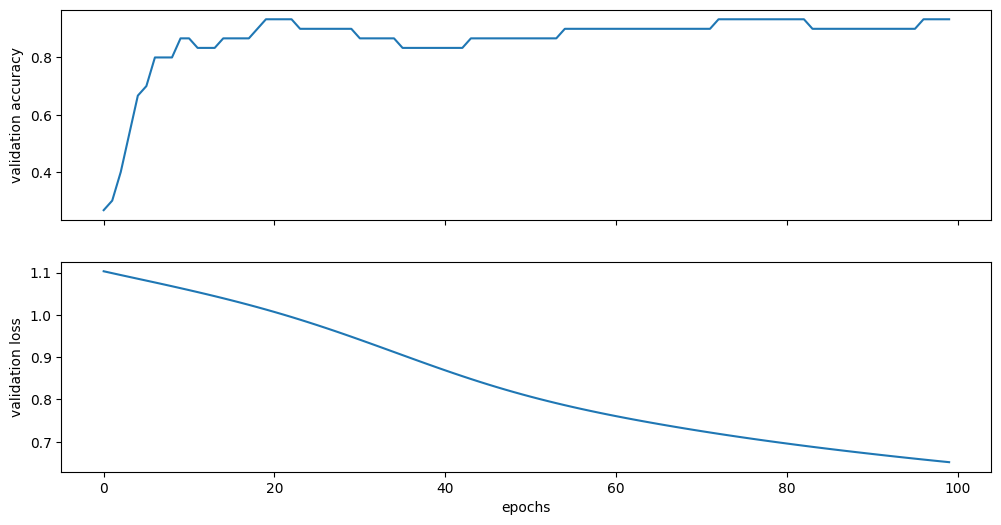

In [16]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

2a.ChatGPT

User
Try changing the number of hidden layers.

ChatGPT
Sure! Modifying the number of hidden layers in a neural network is a common way to adjust its complexity and performance. Here's a brief overview of how you might do this in a simple neural network using Python and a framework like TensorFlow or PyTorch.

Using TensorFlow/Keras
If you're using TensorFlow with Keras, you can define a neural network model and change the number of hidden layers easily. Here's an example:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
If you're using PyTorch, defining the model is slightly different but equally straightforward. Here's how you can add a variable number of hidden layers:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 128
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Input Layer: Specifies the input dimensions of the data.
Hidden Layers: Loops through the specified number of hidden layers, adding each layer with a ReLU activation function.
Output Layer: Defines the output dimensions of the network, often using a softmax activation function for classification tasks.
Compilation (for TensorFlow/Keras): Configures the learning process with an optimizer, loss function, and metrics.
Adjust the number_of_hidden_layers, hidden_units, and other hyperparameters according to your specific problem and dataset. This flexibility allows you to experiment with the depth of your neural network and observe its impact on performance.





User
Try changing the number of neurons in the hidden layer.

ChatGPT
Certainly! Adjusting the number of neurons in the hidden layers is another way to control the capacity and complexity of your neural network. Here's how you can modify the number of neurons in the hidden layers using both TensorFlow/Keras and PyTorch.

Using TensorFlow/Keras
In TensorFlow/Keras, you can change the number of neurons in the hidden layers by adjusting the units parameter when adding a Dense layer. Here's an example:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define hyperparameters
input_dim = 784  # Example input dimension
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10  # Example output dimension (e.g., number of classes)
number_of_hidden_layers = 3  # Number of hidden layers

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers with the specified number of neurons
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
In PyTorch, you can change the number of neurons by adjusting the hidden_units parameter when defining the layers. Here's an example:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Hidden Units: This parameter specifies the number of neurons in each hidden layer.
Input Layer: Defines the input dimension of your data.
Hidden Layers: Each hidden layer has the same number of neurons defined by the hidden_units parameter.
Output Layer: Defines the output dimension, often using a softmax activation function for classification tasks.
Compilation (for TensorFlow/Keras): Configures the learning process with an optimizer, loss function, and metrics.
Adjust the hidden_units parameter to experiment with different numbers of neurons in the hidden layers and observe the impact on model performance. This can help you find an optimal network configuration for your specific problem.

1a.
Sure! Modifying the number of hidden layers in a neural network is a common way to adjust its complexity and performance. Here's a brief overview of how you might do this in a simple neural network using Python and a framework like TensorFlow or PyTorch.

Using TensorFlow/Keras
If you're using TensorFlow with Keras, you can define a neural network model and change the number of hidden layers easily. Here's an example:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
If you're using PyTorch, defining the model is slightly different but equally straightforward. Here's how you can add a variable number of hidden layers:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 128
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Input Layer: Specifies the input dimensions of the data.
Hidden Layers: Loops through the specified number of hidden layers, adding each layer with a ReLU activation function.
Output Layer: Defines the output dimensions of the network, often using a softmax activation function for classification tasks.
Compilation (for TensorFlow/Keras): Configures the learning process with an optimizer, loss function, and metrics.
Adjust the number_of_hidden_layers, hidden_units, and other hyperparameters according to your specific problem and dataset. This flexibility allows you to experiment with the depth of your neural network and observe its impact on performance.

3a.ChatGPT

User
Try changing the number of hidden layers.

ChatGPT
Sure! Modifying the number of hidden layers in a neural network is a common way to adjust its complexity and performance. Here's a brief overview of how you might do this in a simple neural network using Python and a framework like TensorFlow or PyTorch.

Using TensorFlow/Keras
If you're using TensorFlow with Keras, you can define a neural network model and change the number of hidden layers easily. Here's an example:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
If you're using PyTorch, defining the model is slightly different but equally straightforward. Here's how you can add a variable number of hidden layers:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 128
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Input Layer: Specifies the input dimensions of the data.
Hidden Layers: Loops through the specified number of hidden layers, adding each layer with a ReLU activation function.
Output Layer: Defines the output dimensions of the network, often using a softmax activation function for classification tasks.
Compilation (for TensorFlow/Keras): Configures the learning process with an optimizer, loss function, and metrics.
Adjust the number_of_hidden_layers, hidden_units, and other hyperparameters according to your specific problem and dataset. This flexibility allows you to experiment with the depth of your neural network and observe its impact on performance.





User
Try changing the number of neurons in the hidden layer.

ChatGPT
Certainly! Adjusting the number of neurons in the hidden layers is another way to control the capacity and complexity of your neural network. Here's how you can modify the number of neurons in the hidden layers using both TensorFlow/Keras and PyTorch.

Using TensorFlow/Keras
In TensorFlow/Keras, you can change the number of neurons in the hidden layers by adjusting the units parameter when adding a Dense layer. Here's an example:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define hyperparameters
input_dim = 784  # Example input dimension
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10  # Example output dimension (e.g., number of classes)
number_of_hidden_layers = 3  # Number of hidden layers

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers with the specified number of neurons
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='relu'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
In PyTorch, you can change the number of neurons by adjusting the hidden_units parameter when defining the layers. Here's an example:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)

    def forward(self, x):
        x = torch.relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = torch.relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Hidden Units: This parameter specifies the number of neurons in each hidden layer.
Input Layer: Defines the input dimension of your data.
Hidden Layers: Each hidden layer has the same number of neurons defined by the hidden_units parameter.
Output Layer: Defines the output dimension, often using a softmax activation function for classification tasks.
Compilation (for TensorFlow/Keras): Configures the learning process with an optimizer, loss function, and metrics.
Adjust the hidden_units parameter to experiment with different numbers of neurons in the hidden layers and observe the impact on model performance. This can help you find an optimal network configuration for your specific problem.





User
Try using a different activation function.

ChatGPT




User
Try using a different activation function

ChatGPT
Sure! Different activation functions can impact how the model learns and performs. Common activation functions include ReLU, Sigmoid, Tanh, and Leaky ReLU. I'll demonstrate how to use these in both TensorFlow/Keras and PyTorch.

Using TensorFlow/Keras
You can change the activation function by specifying it in the Dense layers. Here's an example using the Tanh activation function:

python
Copy code
import tensorflow as tf
from tensorflow.keras import layers, models

# Define hyperparameters
input_dim = 784  # Example input dimension
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10  # Example output dimension (e.g., number of classes)
number_of_hidden_layers = 3  # Number of hidden layers

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(input_dim,)))

# Hidden layers with Tanh activation function
for _ in range(number_of_hidden_layers):
    model.add(layers.Dense(units=hidden_units, activation='tanh'))

# Output layer
model.add(layers.Dense(units=output_dim, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Summary of the model
model.summary()
Using PyTorch
In PyTorch, you can change the activation function in the forward method of your model class. Here's an example using the Leaky ReLU activation function:

python
Copy code
import torch
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, hidden_units, output_dim, number_of_hidden_layers):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, hidden_units)
        
        self.hidden_layers = nn.ModuleList()
        for _ in range(number_of_hidden_layers):
            self.hidden_layers.append(nn.Linear(hidden_units, hidden_units))
        
        self.output_layer = nn.Linear(hidden_units, output_dim)
        self.leaky_relu = nn.LeakyReLU(negative_slope=0.01)

    def forward(self, x):
        x = self.leaky_relu(self.input_layer(x))
        for layer in self.hidden_layers:
            x = self.leaky_relu(layer(x))
        x = self.output_layer(x)
        return x

# Example usage
input_dim = 784
hidden_units = 256  # Number of neurons in each hidden layer
output_dim = 10
number_of_hidden_layers = 3

model = NeuralNetwork(input_dim, hidden_units, output_dim, number_of_hidden_layers)
print(model)
Explanation
Activation Functions:

ReLU (Rectified Linear Unit): Commonly used because it helps to mitigate the vanishing gradient problem.
Tanh (Hyperbolic Tangent): Outputs values between -1 and 1, which can center the data and make learning easier in some cases.
Sigmoid: Outputs values between 0 and 1, often used in the output layer for binary classification problems.
Leaky ReLU: Similar to ReLU but allows a small gradient when the unit is not active, which can help with some issues of dead neurons.
Changing Activation Functions:

In TensorFlow/Keras, specify the activation function using the activation parameter in the Dense layer.
In PyTorch, use the desired activation function in the forward method.
Experimenting with different activation functions can help determine which one works best for your specific problem. Each activation function has its own advantages and potential drawbacks, so it's worth trying several to see which yields the best performance.